# <u> Statistics for Physics Analysis Mini-Project: HEP

# <u> 3.1

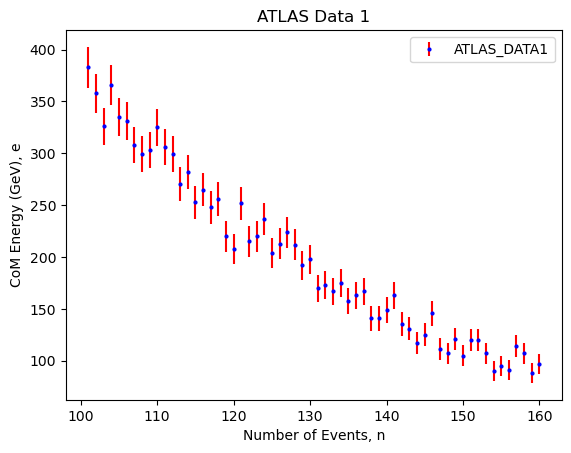

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
import numpy as np
with h5py.File('ATLAS_DATA1.h5', 'r') as file:
    e = np.array(file['e'])
    n=np.array(file['n'])
    
errors = np.sqrt(n)
plt.errorbar(e,n,yerr=errors, fmt='o', markersize = '2', label = 'ATLAS_DATA1', color = 'b', ecolor = 'r')
plt.title('ATLAS Data 1')
plt.xlabel('Number of Events, n')
plt.ylabel('CoM Energy (GeV), e')
plt.legend()
plt.show()

The graph shows the Centre of Mass energy (GeV) in dependence of the Number of Events, where the data points are shown by blue dots and the uncertainty by the red lines

In [2]:
import scipy
from scipy import stats
from scipy.optimize import curve_fit
def exponential_function(e, a, b):
    '''Function returns exponential given in the worksheet'''
    f = a*np.exp(b*e)
    return f

Fitted Parameters: a = 4119.462255351274 +- 264.7972209155969, b = -0.023819154804696714 +- 0.0005414253640609616


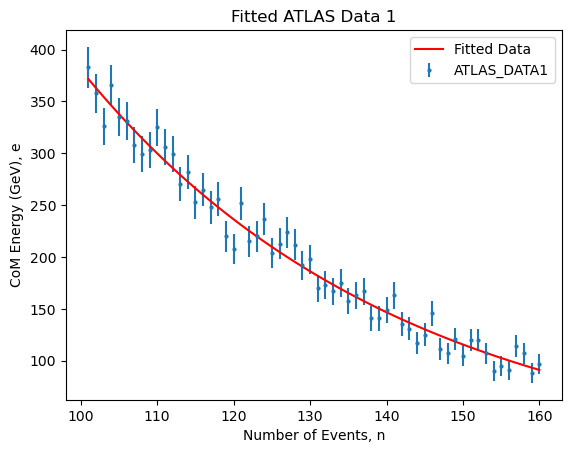

In [3]:
init_a = 0.1
init_b = 0.1
initial_params = (init_a, init_b)
params, covariance = curve_fit(exponential_function, e, n, p0 = initial_params)
a_fit, b_fit = params
a_error, b_error = np.sqrt(np.diag(covariance))
exp_fit = exponential_function(e, a_fit, b_fit)
#residuals = n - exp_fit
plt.errorbar(e, n, yerr = np.sqrt(n), fmt = 'o', markersize = '2', label = 'ATLAS_DATA1')
plt.plot(e, exponential_function(e,a_fit,b_fit), label='Fitted Data', color = 'r')
#plt.errorbar(e, residuals, yerr=np.sqrt(n), fmt='o', label='Residuals', color = 'g')
print(f"Fitted Parameters: a = {a_fit} +- {a_error}, b = {b_fit} +- {b_error}")
plt.title('Fitted ATLAS Data 1')
plt.xlabel('Number of Events, n')
plt.ylabel('CoM Energy (GeV), e')
plt.legend()
plt.show()

The fitted data for the Centre of Mass Energy (GeV) in dependence of the Number of Events. The blue dots/lines show the data plotted in the previous graph, whilst the red line shows the fit of our data according to the exponential function found in the cell above the graph.

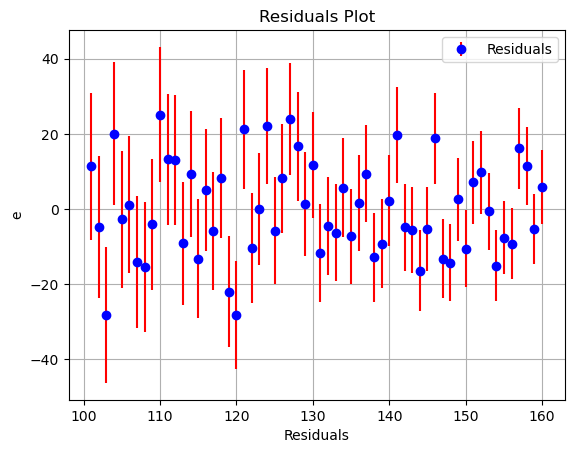

In [4]:
residuals = n - exp_fit
plt.errorbar(e, residuals, yerr=np.sqrt(n), fmt='o', label='Residuals', color = 'b', ecolor = 'r')
plt.legend()
plt.title('Residuals Plot')
plt.xlabel('Residuals')
plt.ylabel('e')
plt.grid()
plt.show()

The Centre of Mass Energy in dependence of the residuals, calculated in the cell above. The blue dots show the data points, whilst the lines represent the uncertainty.

In [5]:
from scipy.stats import chi2, norm
NDF = len(e) - 2 #Can use e or n for this
chi2_stat = np.sum((residuals / np.sqrt(n))**2)
reduced_chi2 = chi2_stat/NDF
p_value = 1 - chi2.cdf(chi2_stat, df=NDF)
critical_region = chi2.ppf(0.99, NDF)
print("The critical region is:", critical_region)

The critical region is: 85.95017624510335


In [6]:
print(f"Chi-squared statistic ($\chi^2$): {chi2_stat}")
print(f"Reduced chi-squared: {reduced_chi2}")
print(f"P(x > χ²): {p_value}")

Chi-squared statistic ($\chi^2$): 51.80125595386026
Reduced chi-squared: 0.8931251026527631
P(x > χ²): 0.703642903688102


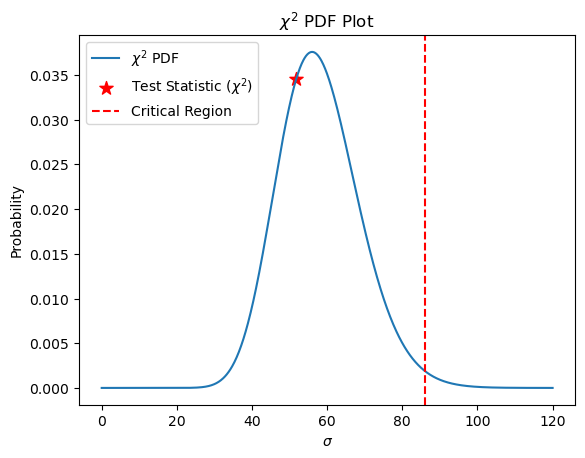

In [7]:
x = np.linspace(0, 120, 1000)
chi2_pdf = chi2.pdf(x, df=NDF)
plt.plot(x, chi2_pdf, label='$\chi^2$ PDF')
plt.scatter(chi2_stat, chi2.pdf(chi2_stat, df=NDF), color='red', marker='*', s=100, label='Test Statistic ($\chi^2$)')
plt.axvline(critical_region, color='red', linestyle='--', label='Critical Region')
plt.title('$\chi^2$ PDF Plot')
plt.xlabel('$\sigma$')
plt.ylabel('Probability')
plt.legend()
plt.show()

The probability density function plot for $\chi^2$, where the probability is shown on the y-axis and the uncertainty ($\sigma$) is shown on the x-axis. The distribution is shown by the blue line, the test statistic is shown by the red star on the distribution, and the critical region is shown by the red dashed line.

In [8]:
sigma_test_statistic = np.sqrt(chi2_stat/NDF)
significance_sigma = np.abs((chi2_stat-NDF)/np.sqrt(2*NDF))
p_value_gaussian = 1 - norm.cdf(sigma_test_statistic)
print(f"P2(x > 𝜒2$) for Gaussian approximation: {p_value_gaussian}") #Had to copy and paste symbols from above as they wouldn't print correctly
print(f"Significance in terms of 𝜎: {significance_sigma}")

P2(x > 𝜒2$) for Gaussian approximation: 0.17231591875365848
Significance in terms of 𝜎: 0.5755389359604527


The mean of the Gaussian is: 10.723805294763608


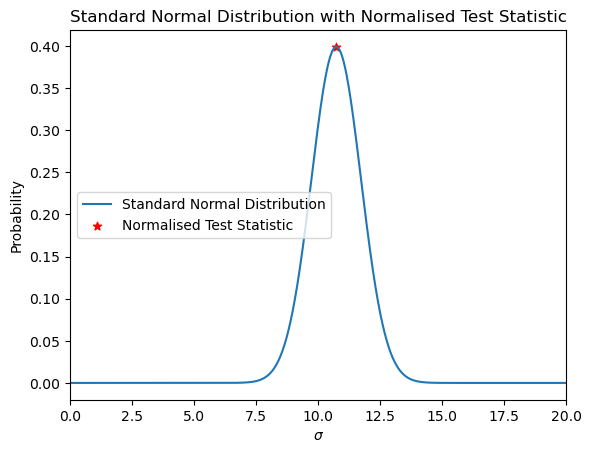

0.39893271354847243


In [9]:
x_gaussian = np.linspace(0,20,1000)
mean_gaussian = np.sqrt((2*NDF)-1)
print("The mean of the Gaussian is:", mean_gaussian)
variance_gaussian = 1

pdf_gaussian = norm.pdf(x_gaussian, loc=mean_gaussian, scale=variance_gaussian)

plt.plot(x_gaussian, pdf_gaussian, label='Standard Normal Distribution')
#plt.axvline(mean_gaussian, color='red', linestyle='--', label='Test Statistic ($\sigma$)', marker = '*')
plt.scatter(mean_gaussian, 0.39892282507396987, marker = '*', color = 'r', label = 'Normalised Test Statistic')
plt.xlabel('$\sigma$')
plt.ylabel('Probability')
plt.legend()
plt.xlim(0,20)
plt.title('Standard Normal Distribution with Normalised Test Statistic')
plt.show()
print(np.max(pdf_gaussian)) #To plot normalised test statistic

The normalised probability density function plot for  𝜒2
 , where the probability is shown on the y-axis and the uncertainty ( 𝜎
 ) is shown on the x-axis. The normalised distribution is shown by the blue line and the normalised test statistic is shown by the red star on the distribution.

## Conclusion:

Since our value of the significance is below that of the normal standard deviation for the normal fit (1), and our chisqrd value is below the critical region, then our value for chisqrd is reasonable - the fitted data follows the distribution.

In [10]:
sum_n = np.sum(n)
print("Total Number of Events is:", sum_n)

Total Number of Events is: 12002.0


# <u> 3.2

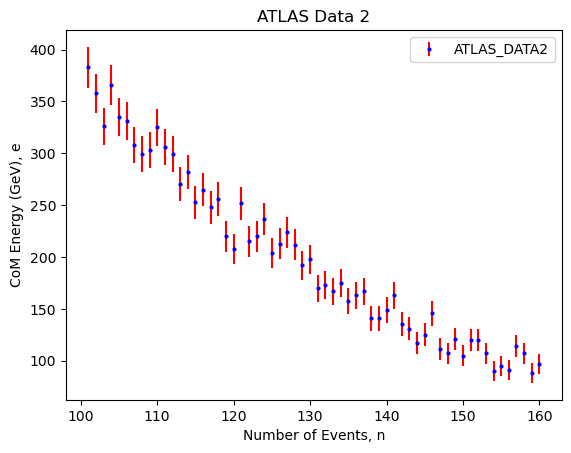

In [11]:
with h5py.File('ATLAS_DATA2.h5', 'r') as file:
    e = np.array(file['e'])
    n1=np.array(file['n'])
    
errors = np.sqrt(n)
plt.errorbar(e,n,yerr=errors, fmt='o', markersize = '2', label = 'ATLAS_DATA2', color = 'b', ecolor = 'r')
plt.title('ATLAS Data 2')
plt.xlabel('Number of Events, n')
plt.ylabel('CoM Energy (GeV), e')
plt.legend()
plt.show()

The graph shows the Centre of Mass energy (GeV) in dependence of the Number of Events, where the data points (for ATLAS_DATA2) are shown by blue dots and the uncertainty by the red lines.

Fitted Parameters: a = 4204.232928519406 +- 114.05479956184986, b = -0.023983095505421537 +- 0.00022863827751663012


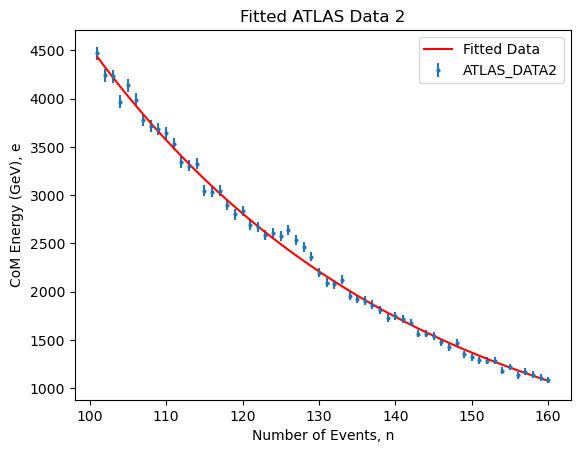

In [12]:
def exponential_function(e, a, b):
    '''Function returns exponential given in the worksheet'''
    a1 = a*(np.sum(n1)/np.sum(n))
    f = a1*np.exp(b*e)
    return f
init_a = 0
init_b = 0.1
initial_params = (init_a, init_b)
params, covariance = curve_fit(exponential_function, e, n1, p0 = initial_params)
a_fit, b_fit = params
a_error, b_error = np.sqrt(np.diag(covariance))
exp_fit = exponential_function(e, a_fit, b_fit)
#residuals = n - exp_fit
plt.errorbar(e, n1, yerr = np.sqrt(n1), fmt = 'o', markersize = '2', label = 'ATLAS_DATA2')
plt.plot(e, exponential_function(e,a_fit,b_fit), label='Fitted Data', color = 'r')
print(f"Fitted Parameters: a = {a_fit} +- {a_error}, b = {b_fit} +- {b_error}")
plt.title('Fitted ATLAS Data 2')
plt.xlabel('Number of Events, n')
plt.ylabel('CoM Energy (GeV), e')
plt.legend()
plt.show()

The fitted data for the Centre of Mass Energy (GeV) in dependence of the Number of Events. The blue dots/lines show the data plotted in the previous graph, whilst the red line shows the fit of our data according to the exponential function found in the cell above the graph.

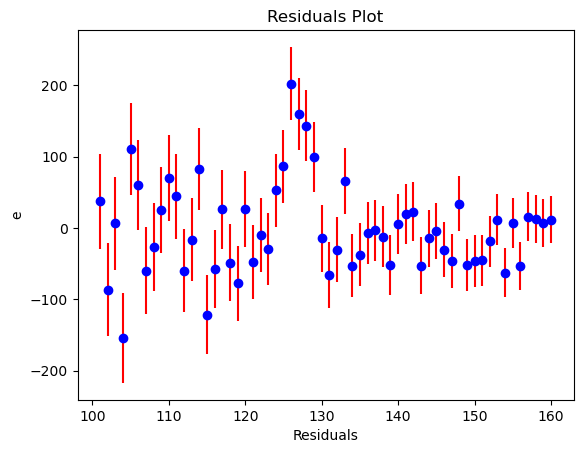

In [13]:
residuals = n1 - exp_fit
plt.errorbar(e, residuals, yerr=np.sqrt(n1), fmt='o', label='Residuals', color = 'b', ecolor = 'r')
plt.grid()
plt.title('Residuals Plot')
plt.xlabel('Residuals')
plt.ylabel('e')
plt.grid()
plt.show()

The Centre of Mass Energy in dependence of the residuals, calculated in the cell above. The blue dots show the data points, whilst the lines represent the uncertainty.

In [14]:
NDF = len(e) - 2 #Can use e or n for this
chi2_stat = np.sum((residuals / np.sqrt(n1))**2)
critical_region = chi2.ppf(0.99, NDF)
print(critical_region)
reduced_chi2 = chi2_stat/NDF
p_value = 1 - chi2.cdf(chi2_stat, df=NDF)

85.95017624510335


In [15]:
print(f"Chi-squared statistic ( 𝜒2): {chi2_stat}")
print(f"Reduced chi-squared: {reduced_chi2}")
print(f"P(x > χ²): {p_value}")

Chi-squared statistic ( 𝜒2): 96.71369901057601
Reduced chi-squared: 1.6674775691478623
P(x > χ²): 0.0010751274171326708


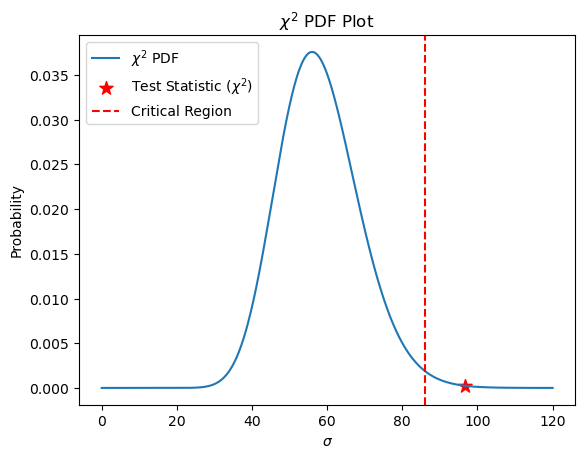

In [16]:
x = np.linspace(0, 120, 1000)
chi2_pdf = chi2.pdf(x, df=NDF)
plt.plot(x, chi2_pdf, label='$\chi^2$ PDF')
plt.scatter(chi2_stat, chi2.pdf(chi2_stat, df=NDF), color='red', marker='*', s=100, label='Test Statistic ($\chi^2$)')
plt.axvline(critical_region, color='red', linestyle='--', label='Critical Region')
plt.legend()
plt.title('$\chi^2$ PDF Plot')
plt.xlabel('$\sigma$')
plt.ylabel('Probability')
plt.show()

The probability density function plot for  𝜒2
 , where the probability is shown on the y-axis and the uncertainty ( 𝜎
 ) is shown on the x-axis. The distribution is shown by the blue line, the test statistic is shown by the red star on the distribution, and the critical region is shown by the red dashed line.

In [17]:
#Calculate significance of result in terms of sigma
sigma_test_statistic = np.sqrt(chi2_stat/NDF)
print('Significance level is:', sigma_test_statistic)

Significance level is: 1.2913084717246543


Since our value of the significance is above that of the normal standard deviation for the normal fit (1), and our chisqrd value is greater than the critical region, then our value for chisqrd is unreasonable and suggests that the fitted data does not follow the distribution.

The fact that the fitted data does not follow our expected distribution, as evidenced by our explanation above, shows that the Higgs is present.

# <u> 3.3

Fitted Parameters: a = 51039.96496793283 +- 1075.2635899130469, b = -0.024207994055974524 +- 0.00017948384830516302, A = 211.53049264815692 +- 36.20353301770832, mu = 126.74039479490712 +- 0.3170471496528357, sigma = 1.6214885199093483 +- 0.32754695170603476


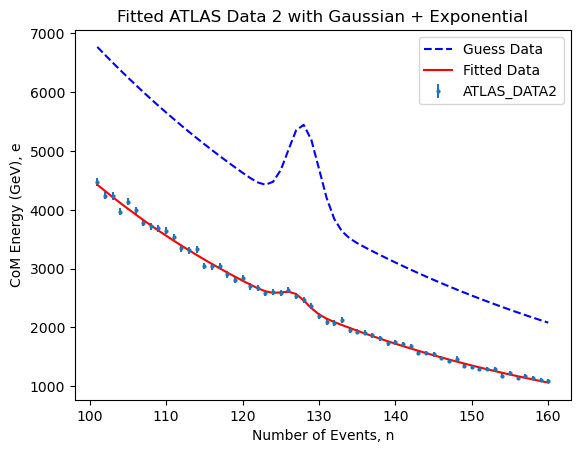

In [18]:
def exponential_function_with_Gaussian(e, a, b, A, mu, sigma):
    '''Function returns exponential given in the worksheet, with a Gaussian distribution added'''
    #a1 = a*(np.sum(n1)/np.sum(n))
    f = a*np.exp(b*e)
    g = A*np.exp((-(e-mu)**2)/(2*sigma**2))
    return f+g
init_a = 51039
init_b = -0.02
init_A = 1500
init_mu = 128
init_sigma = 2
plt.plot(e, exponential_function_with_Gaussian(e,init_a,init_b, init_A, init_mu, init_sigma), label='Guess Data', color = 'b', linestyle='--')
initial_params = (init_a, init_b, init_A, init_mu, init_sigma)
params, covariance = curve_fit(exponential_function_with_Gaussian, e, n1, p0 = initial_params, maxfev = 5000)
a_fit, b_fit, A_fit, mu_fit, sigma_fit = params
a_error, b_error, A_error, mu_error, sigma_error = np.sqrt(np.diag(covariance))
n_exp = exponential_function_with_Gaussian(e, a_fit, b_fit, A_fit, mu_fit, sigma_fit)
#residuals = n - exp_fit
plt.errorbar(e, n1, yerr = np.sqrt(n1), fmt = 'o', markersize = '2', label = 'ATLAS_DATA2')
plt.plot(e, exponential_function_with_Gaussian(e,a_fit,b_fit, A_fit, mu_fit, sigma_fit), label='Fitted Data', color = 'r')
#print(f"Fitted Parameters: a = {a_fit} +- {a_error}, b = {b_fit} +- {b_error}")
print(f"Fitted Parameters: a = {a_fit} +- {a_error}, b = {b_fit} +- {b_error}, A = {A_fit} +- {A_error}, mu = {mu_fit} +- {mu_error}, sigma = {sigma_fit} +- {sigma_error}")
plt.title('Fitted ATLAS Data 2 with Gaussian + Exponential')
plt.xlabel('Number of Events, n')
plt.ylabel('CoM Energy (GeV), e')
plt.legend()
plt.show()

The fitted data for the Centre of Mass Energy (GeV) in dependence of the Number of Events, for our new function (Exponential + Gaussian). The blue dots/lines show the data plotted in the previous graph, whilst the red line shows the fit of our data according to the exponential function found in the cell above the graph. The blue dashed line represents the initial plot made to adjust our parameters for the fit.

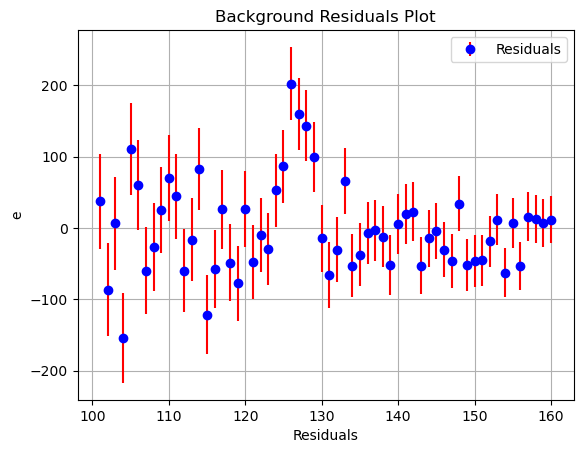

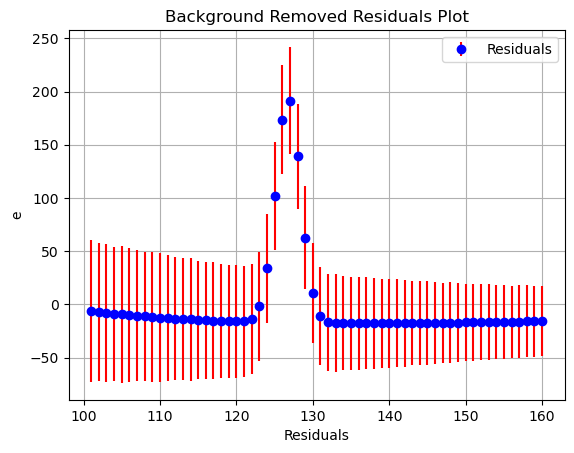

In [19]:
background_residuals = n1 - exp_fit
plt.errorbar(e, background_residuals, yerr=np.sqrt(n1), fmt='o', label='Residuals', color = 'b', ecolor = 'r')
plt.title('Background Residuals Plot')
plt.grid()
plt.xlabel('Residuals')
plt.ylabel('e')
plt.legend()
plt.show()

residuals = n_exp-exp_fit
combined_residuals = n1 - n_exp
plt.errorbar(e, residuals, yerr=np.sqrt(n1), fmt='o', label='Residuals', color = 'b', ecolor = 'r')
plt.title('Background Removed Residuals Plot')
plt.xlabel('Residuals')
plt.ylabel('e')
plt.grid()
plt.legend()
plt.show()

#combined_residuals = n1 - n_exp

The Centre of Mass Energy in dependence of the residuals, calculated in the cell above. The blue dots show the data points, whilst the lines represent the uncertainty.

The first plot (top) shows the residuals plot for the background residuals, whilst the second plot (bottom) shows the residuals of the Exponential+Gaussian with the background removed.

In [20]:
NDF = len(e) - 5 
chi2_stat = np.sum((combined_residuals/np.sqrt(n1))**2)
critical_region = chi2.ppf(0.99, NDF)
print(critical_region)
reduced_chi2 = chi2_stat/NDF
p_value = 1 - chi2.cdf(chi2_stat, df=NDF)

82.29211682919967


In [21]:
print(f"Chi-squared statistic ( 𝜒2): {chi2_stat}")
print(f"Reduced chi-squared: {reduced_chi2}")
print(f"P(x >  𝜒2): {p_value}")

Chi-squared statistic ( 𝜒2): 49.978927376757994
Reduced chi-squared: 0.908707770486509
P(x >  𝜒2): 0.6664105578627401


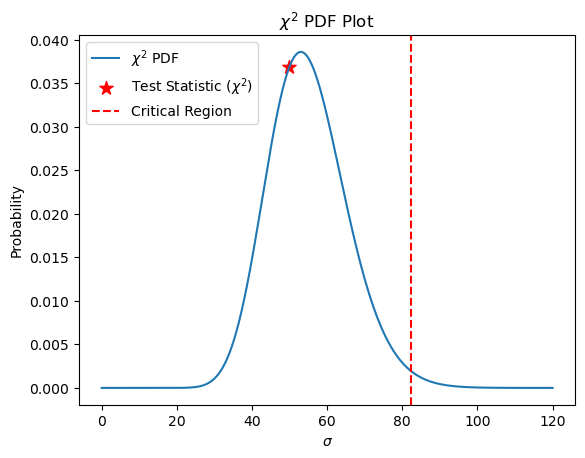

In [22]:
x = np.linspace(0, 120, 1000)
chi2_pdf = chi2.pdf(x, df=NDF)
plt.plot(x, chi2_pdf, label='$\chi^2$ PDF')
plt.scatter(chi2_stat, chi2.pdf(chi2_stat, df=NDF), color='red', marker='*', s=100, label='Test Statistic ($\chi^2$)')
plt.axvline(critical_region, color='red', linestyle='--', label='Critical Region')
plt.title('$\chi^2$ PDF Plot')
plt.xlabel('$\sigma$')
plt.ylabel('Probability')
plt.legend()
plt.show()

The probability density function plot for 𝜒2 , where the probability is shown on the y-axis and the uncertainty ( 𝜎 ) is shown on the x-axis. The distribution is shown by the blue line, the test statistic is shown by the red star on the distribution, and the critical region is shown by the red dashed line.

In [23]:
sigma_test_statistic = np.sqrt(chi2_stat/NDF)
print('Significance level is:', sigma_test_statistic)

Significance level is: 0.953261648492432


Since our value of the significance is below that of the normal standard deviation for the normal fit (1), and our chisqrd value is less than the critical region, then our value for chisqrd is reasonable and suggests that the fitted data follows the distribution.

In [24]:
from scipy.integrate import simps  # Using Simpson's rule for integration
Gaussian_Curve = A_fit*np.exp(-(e-mu_fit)**2 / (2*sigma_fit**2))
N = simps(Gaussian_Curve, e)  # Integrate the Gaussian curve over the energy range 'e'

delta_mu = sigma_fit / np.sqrt(N)

MH = mu_fit

print(f"Measured Mass of Higgs Boson (MH): {MH} GeV")
print(f"Error in Measured Mass ($\Delta$μ): {delta_mu} GeV")

Measured Mass of Higgs Boson (MH): 126.74039479490712 GeV
Error in Measured Mass ($\Delta$μ): 0.05530004460365045 GeV


# <u> Conclusions

To conclude, we can see that ATLAS_DATA1 does not have a Higgs event, and our exponential function fits the data well, due to our $\chi^2$ statistic (51.8) being within the critical region (85.95). For ATLAS_DATA2, we then used the exponential function once more to fit the data, and found that the $\chi^2$ statistic (96.71) lay above the critical region (85.95), indicating that our data did not fit this function very well, indicating the presence of the Higgs boson.
To remedy this, the exponential function used previously was combined with a Gaussian fit. This would allow for the fit of the Higgs peak in the ATLAS_DATA2. When plotting this data, we found that our $\chi^2$ statistic (49.98) lay below the critical region (82.29), and thus our data agreed with our new model.

From this, we could then use the fitted parameter of the mean of the Gaussian to find the measured mass of the Higgs, along with the uncertainty returned for the parameter divided by the square root of N (found by integrating over the energy range). The value we obtained was ($126.74 \pm 0.06$)GeV, which is close to the accepted value of the Higgs boson, ($125.35 \pm 0.15$)GeV.

Higgs Mass reference: https://cms.cern/news/cms-precisely-measures-mass-higgs-boson#:~:text=CMS%20physicists%20recently%20measured%20the,uncertainty%20of%20roughly%200.1%25!